# Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields (2017)


<a href="https://arxiv.org/abs/1812.08008" target="_blank">arXiv:1611.08050</a> [cs.CV] 14 Apr 2017

![Open_Pose](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_NB14_OpenPose_Figure.png)

# Import Libraries

In [36]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo, display, Image

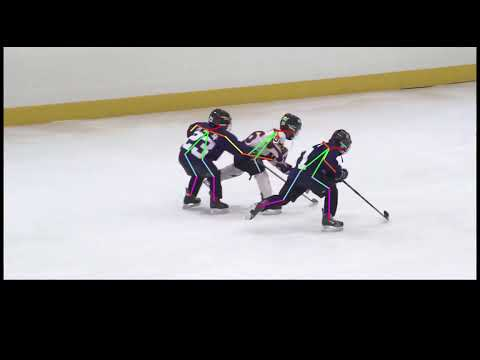

In [37]:
video = YouTubeVideo("RyCsSc_2ZEI", width=1024, height=640)
display(video)

# Load a Caffe Model
A typical Caffe Model has two files

1. **Architecture** : Defined in a **.prototxt** file
2. **Weights** : Defined in **.caffemodel** file

In [38]:
protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "model/pose_iter_160000.caffemodel"

In [39]:
nPoints = 15
POSE_PAIRS = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [1, 5],
    [5, 6],
    [6, 7],
    [1, 14],
    [14, 8],
    [8, 9],
    [9, 10],
    [14, 11],
    [11, 12],
    [12, 13],
]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# Read Image

In [40]:
img = cv2.imread("Tiger_Woods_crop.png")
# img = cv2.imread("Football.png")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width = img_rgb.shape[1]
height = img_rgb.shape[0]

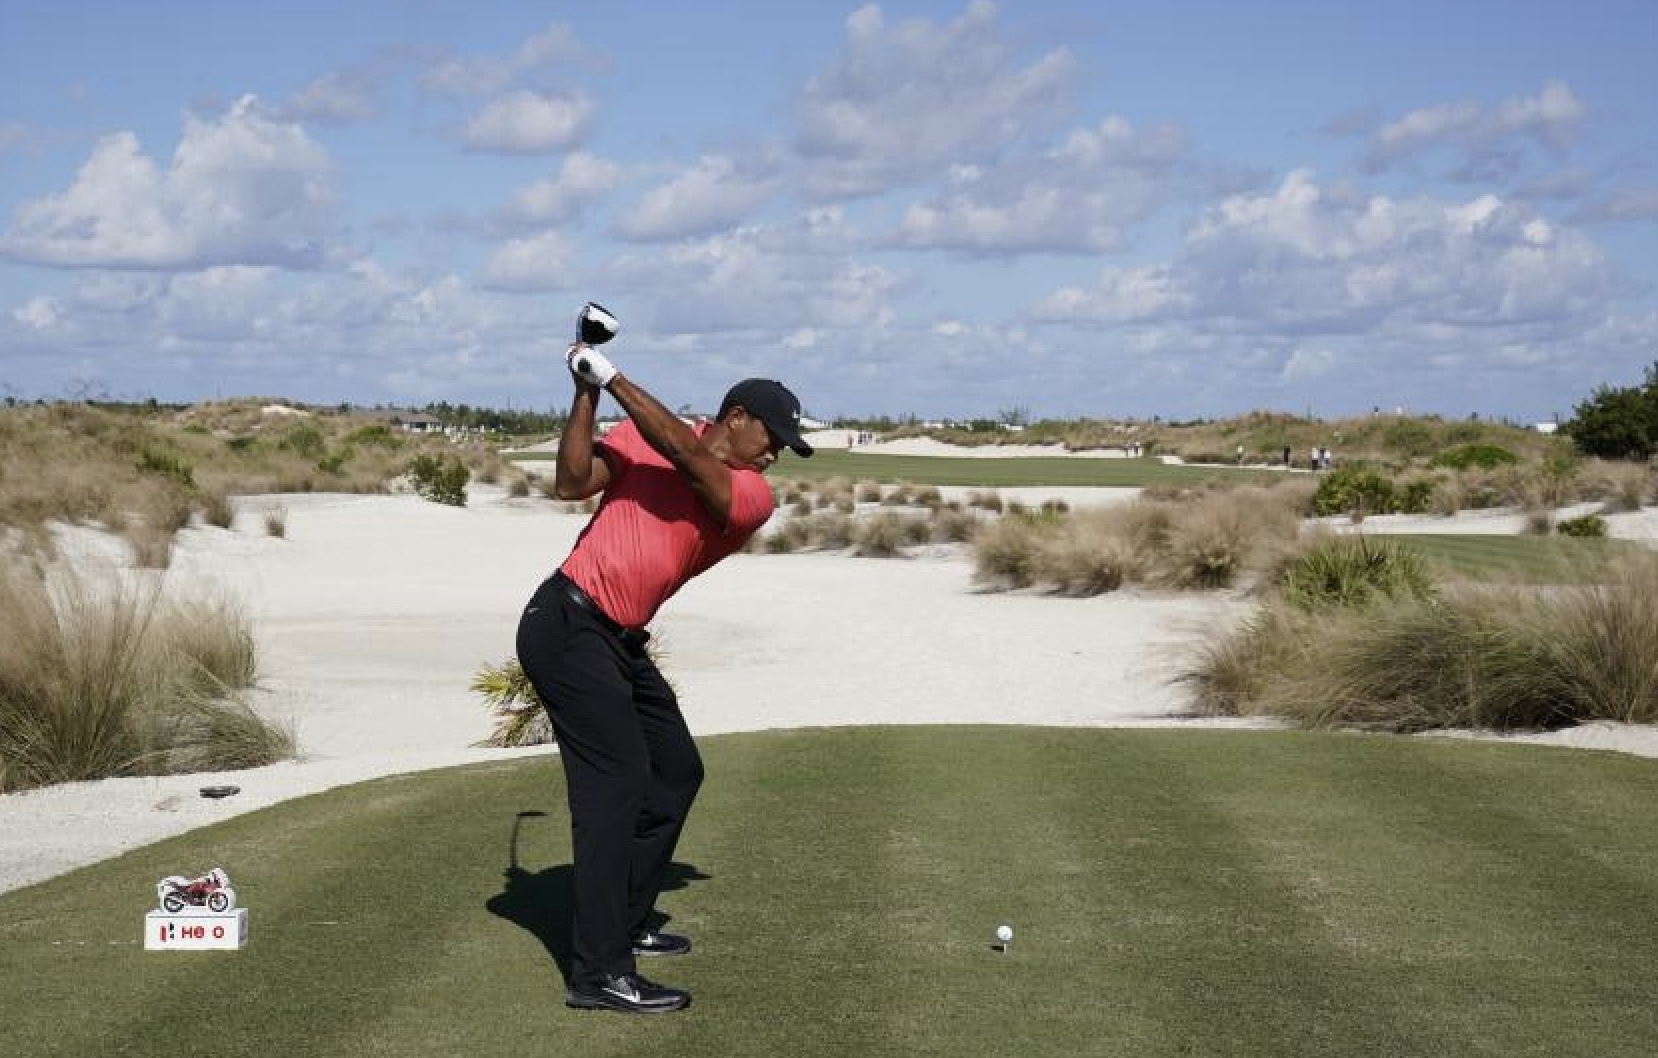

In [41]:
Image(filename="Tiger_Woods.png")

# Convert Image to Blob

In [42]:
netInputSize = (368, 368)
imgBlob = cv2.dnn.blobFromImage(img_rgb, 1.0/255, netInputSize, (0, 0, 0), swapRB=True, crop=False)
net.setInput(imgBlob)

# Run Inference (forward pass)

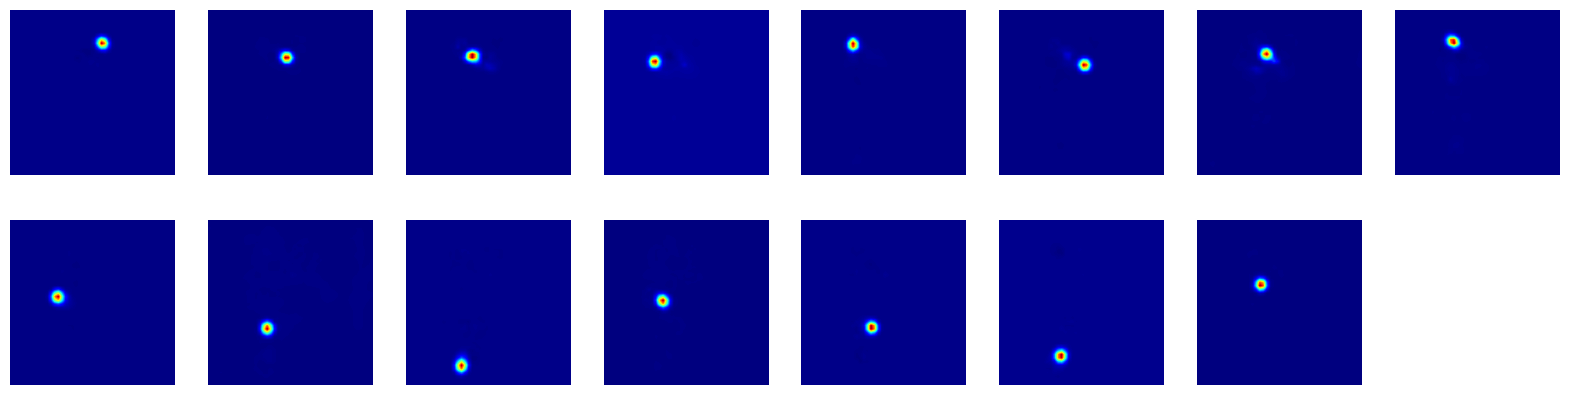

In [43]:
output = net.forward()

plt.figure(figsize=(20,5))
for i in range(nPoints):
    probMap = output[0, i, :, :]
    displayMap = cv2.resize(probMap, (width, height), cv2.INTER_LINEAR)
    plt.subplot(2, 8, i+1); plt.axis("off"); plt.imshow(displayMap, cmap="jet")

# Extract points

In [44]:
scaleX = width / output.shape[3]
scaleY = height / output.shape[2]

# Store detected keypoints
points = []

threshold = 0.1

for i in range(nPoints):
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]
    
    if prob > threshold:
        points.append((int(x), int(y)))
    else:
        points.append(None)

# Display Points and Skeleton

In [45]:
imgPoints = img_rgb.copy()
imgSkeleton = img_rgb.copy()

# Draw points
for i, p in enumerate(points):
    cv2.circle(imgPoints, p, 8, (255, 255, 0), thickness = -1, lineType = cv2.FILLED)
    cv2.putText(imgPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, lineType = cv2.LINE_AA)

# Draw skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]
    
    if points[partA] and points[partB]:
        cv2.line(imgSkeleton, points[partA], points[partB], (255, 255, 0), 2)
        cv2.circle(imgSkeleton, points[partA], 8, (255, 0, 0), thickness = -1, lineType = cv2.FILLED)

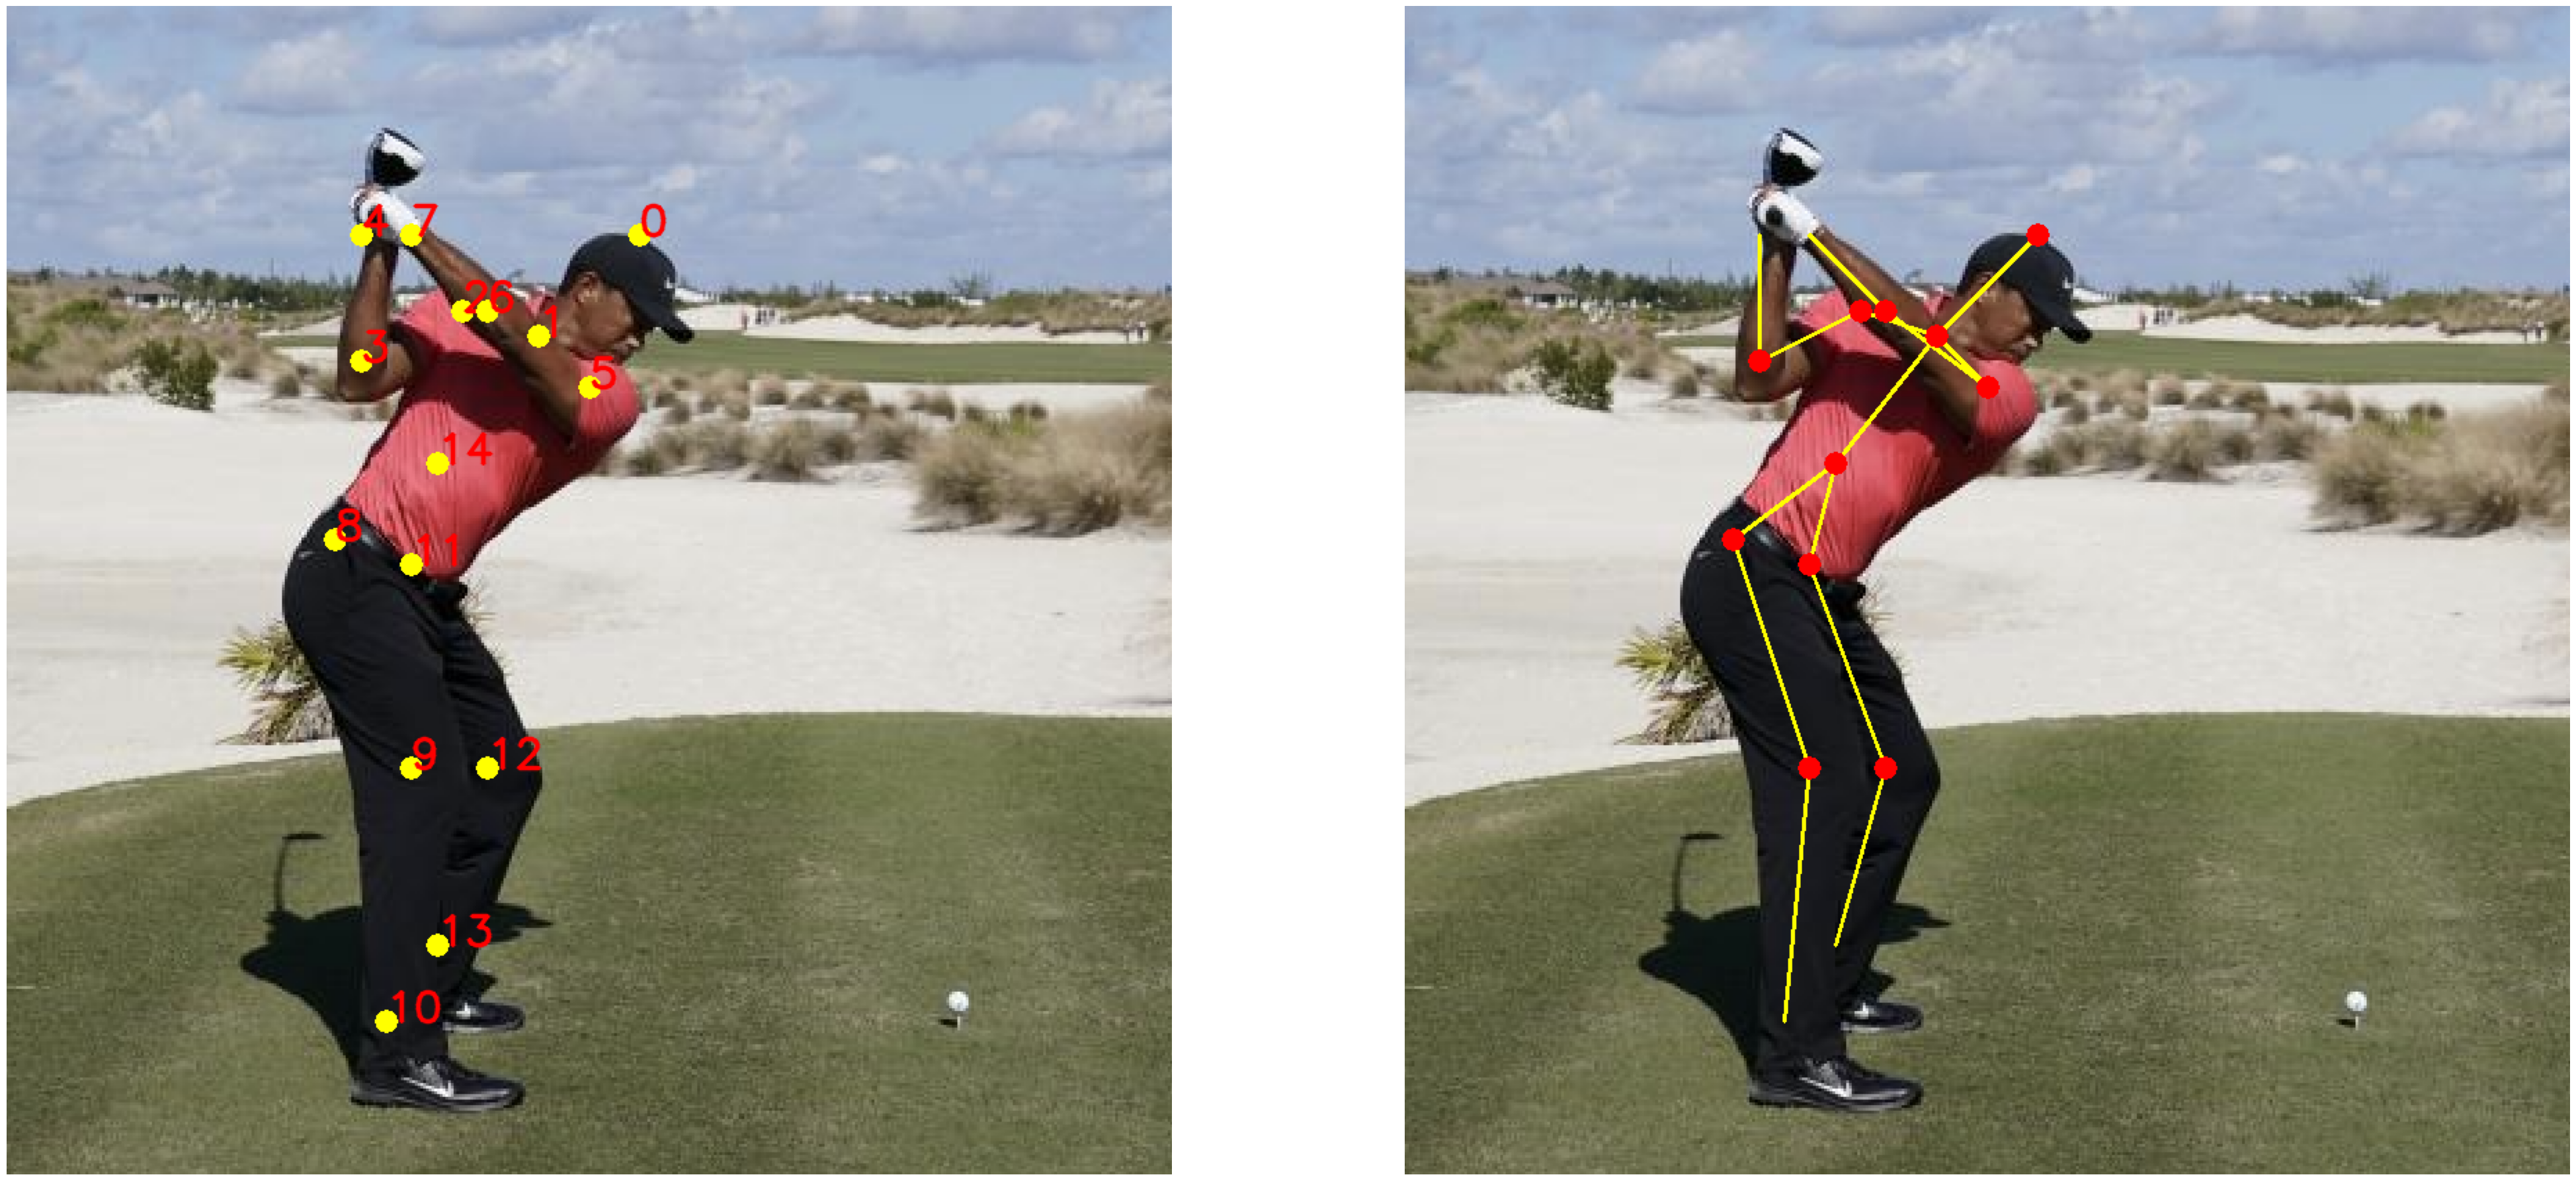

In [46]:
plt.figure(figsize=(50,50))
plt.subplot(121); plt.axis("off"); plt.imshow(imgPoints);
plt.subplot(122); plt.axis("off"); plt.imshow(imgSkeleton);

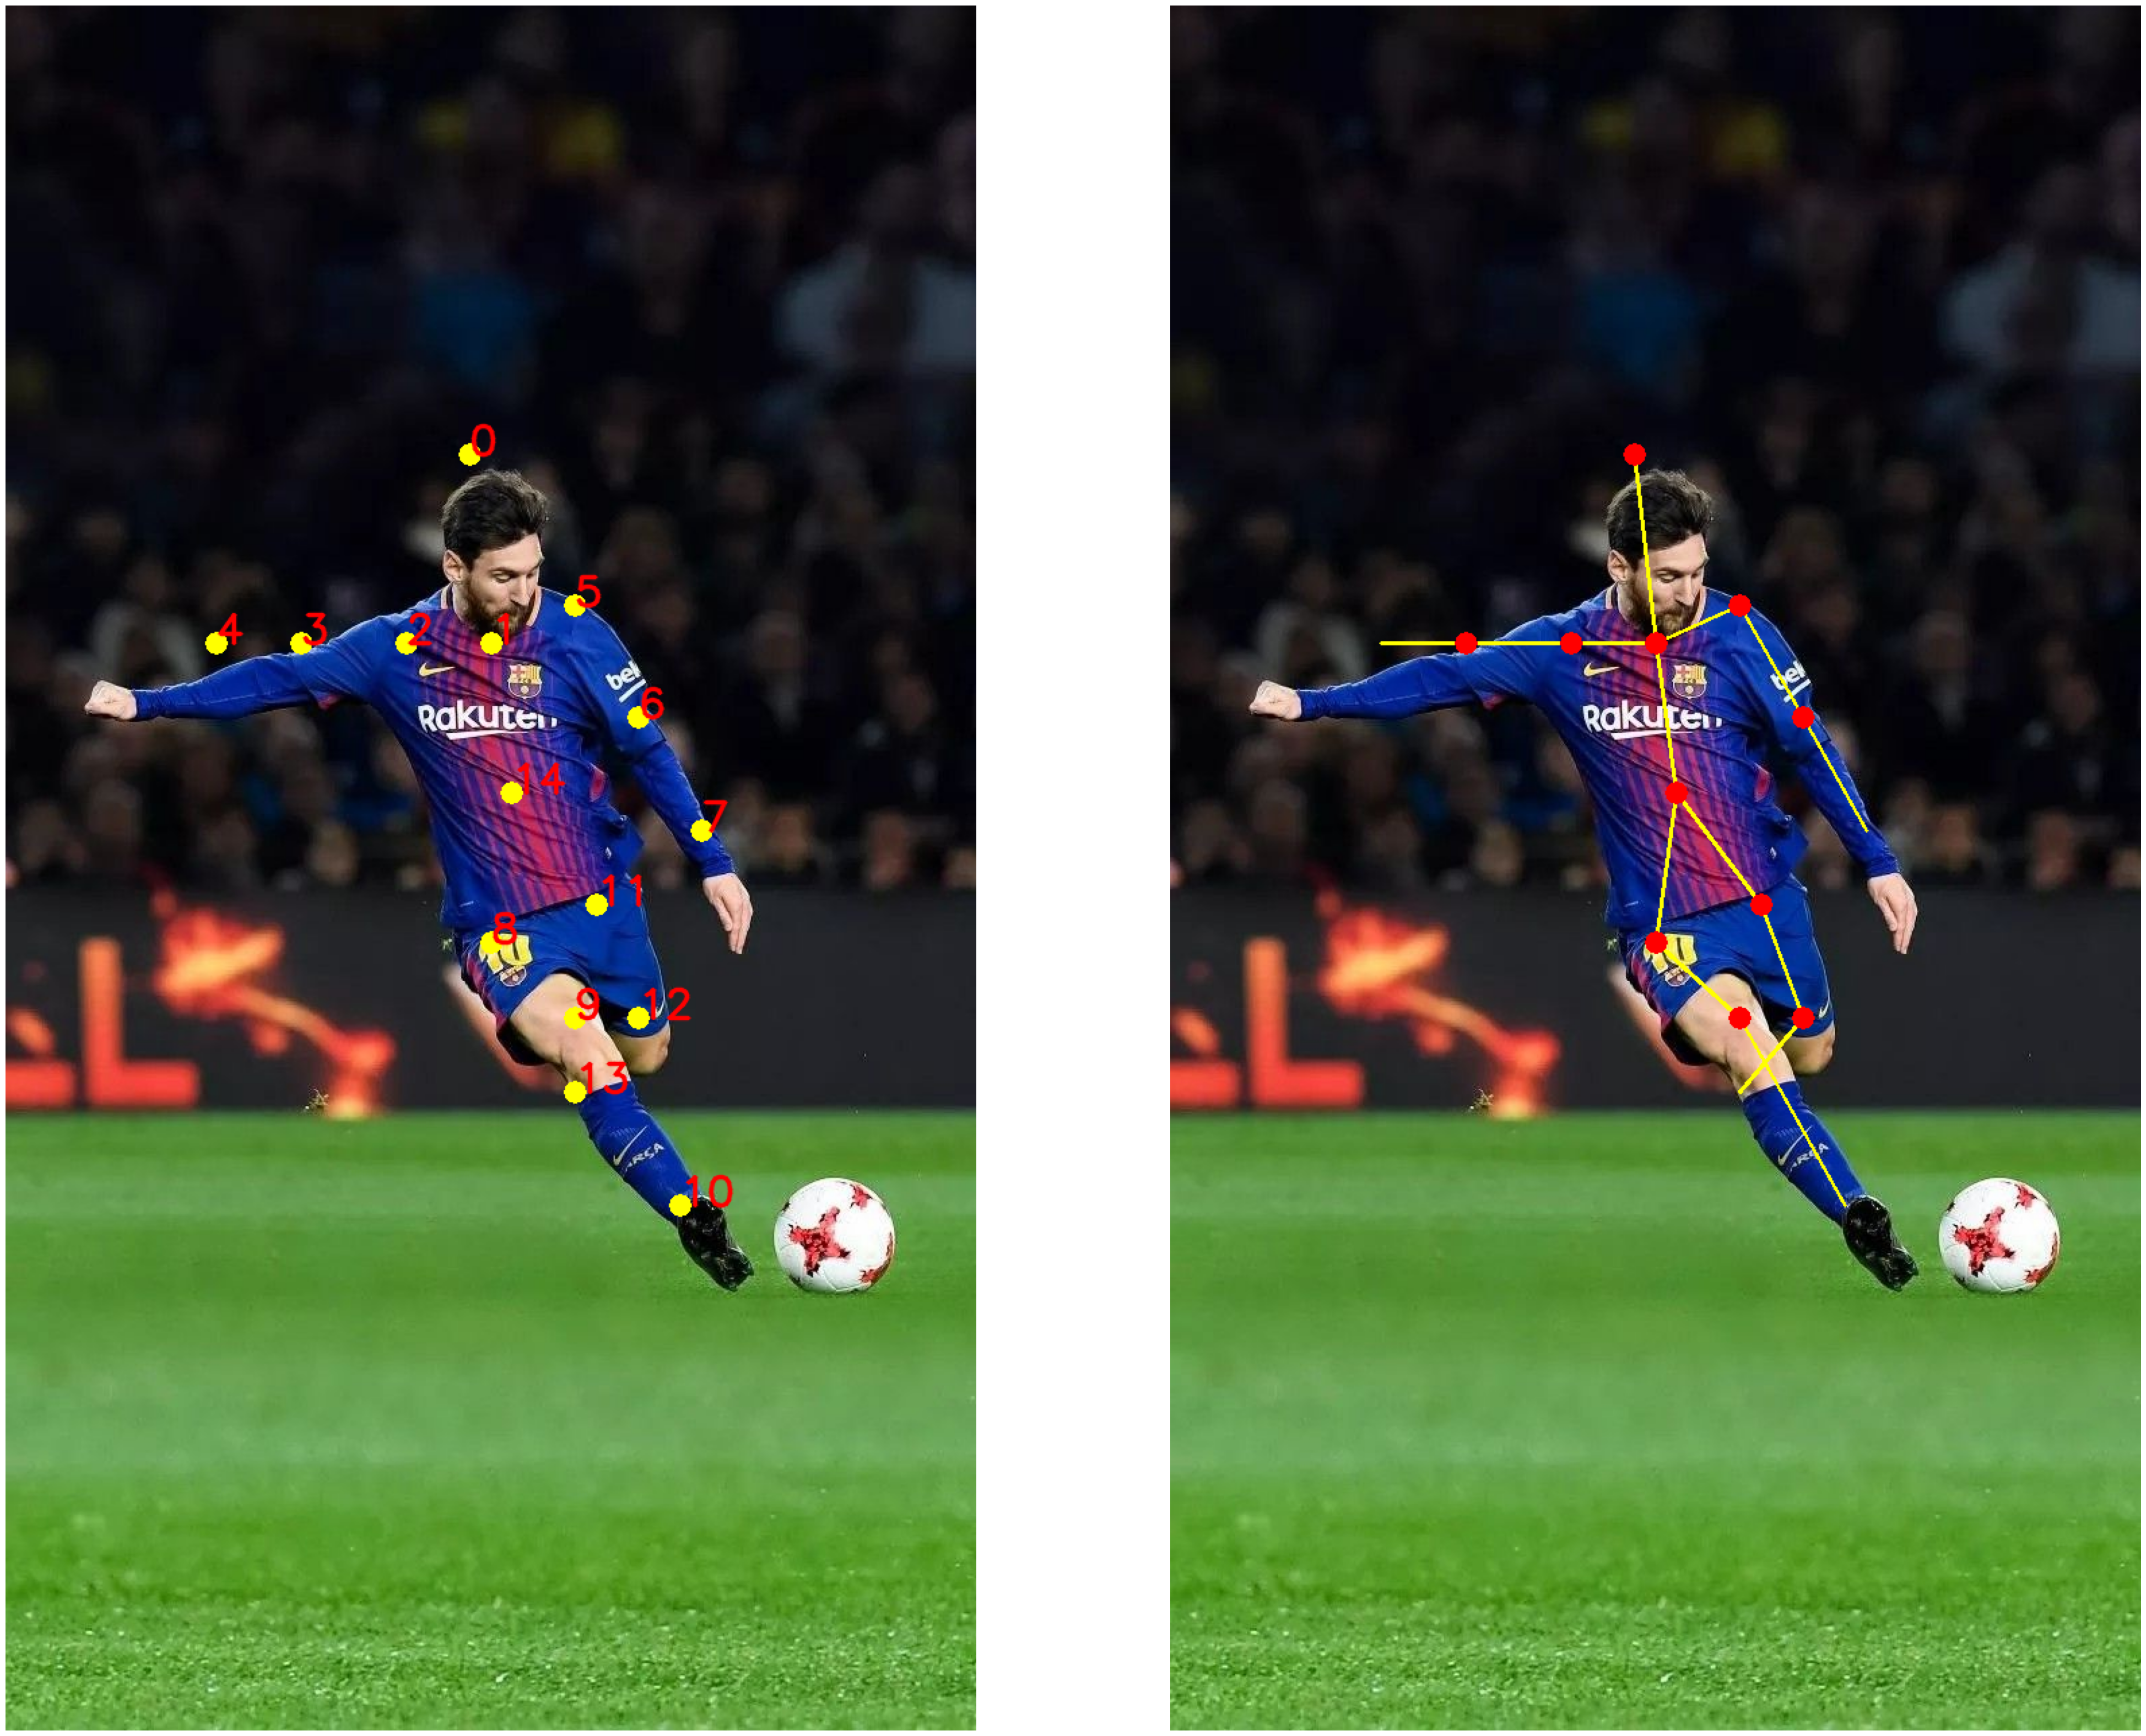

In [47]:
Image(filename="Football.png")